# [Plotting with matplotlib](https://pandas.pydata.org/pandas-docs/version/0.13.1/visualization.html)

In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

mpl.rcParams['xtick.color'] = 'white'
mpl.rcParams['ytick.color'] = 'white'
plt.ion() # interactive mode

## Basic plotting: plot
> The `plot` method on Series and DataFrame is just a simple wrapper around `plt.plot`:

<AxesSubplot:>

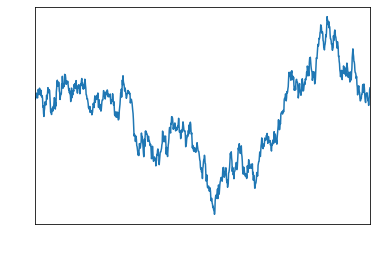

In [4]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

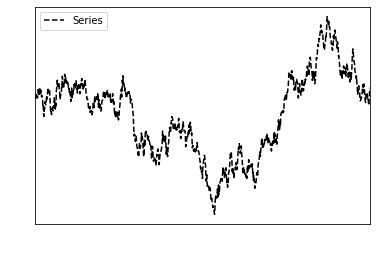

In [5]:
plt.figure() 
ts.plot(style='k--', label='Series') 
plt.legend()

On DataFrame, `plot` is a convenience to plot all of the columns with labels:

<Figure size 432x288 with 0 Axes>

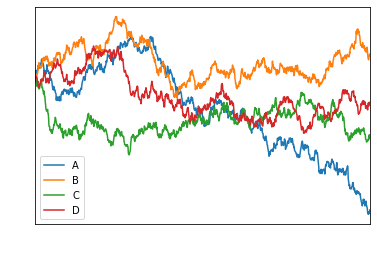

In [6]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()

plt.figure()
df.plot()
plt.legend(loc='best')

You may set the `legend` argument to `False` to hide the legend, which is shown by default.

<AxesSubplot:>

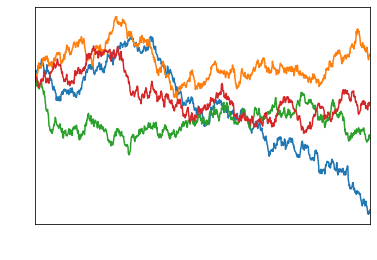

In [7]:
df.plot(legend=False)

Some other options are available, like plotting each Series on a different axis:

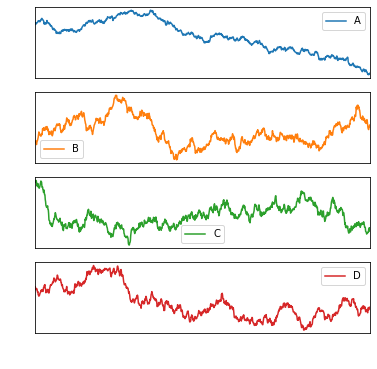

In [8]:
df.plot(subplots=True, figsize=(6, 6))
plt.legend(loc='best');

You may pass `logy` to get a log-scale Y axis.

<AxesSubplot:>

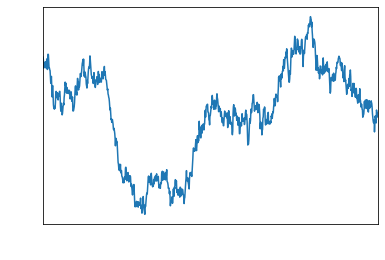

In [9]:
plt.figure()

ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = np.exp(ts.cumsum())

ts.plot(logy=True)

You can plot one column versus another using the x and y keywords in DataFrame.plot:

<Figure size 432x288 with 0 Axes>

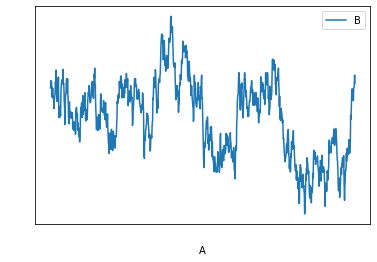

In [14]:
plt.figure()

df3 = pd.DataFrame(np.random.randn(1000, 2), columns=['B', 'C']).cumsum()
df3['A'] = pd.Series(list(range(len(df))))

df3.plot(x='A', y='B');

### Plotting on a Secondary Y-axis
> To plot data on a secondary y-axis, use the `secondary_y` keyword:

<AxesSubplot:>

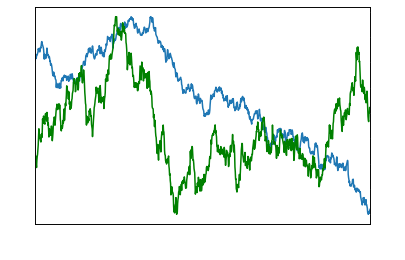

In [15]:
plt.figure()

df['A'].plot()
df['B'].plot(secondary_y=True, style='g')

### Selective Plotting on Secondary Y-axis
> To plot some columns in a DataFrame, give the column names to the `secondary_y` keyword:

Text(0, 0.5, 'AB scale')

<Figure size 432x288 with 0 Axes>

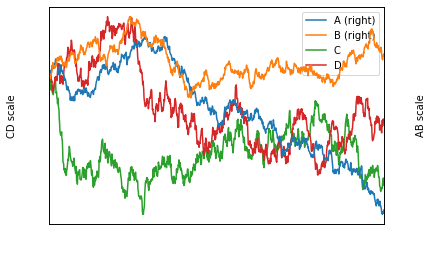

In [16]:
plt.figure() 

ax = df.plot(secondary_y=['A', 'B'])
ax.set_ylabel('CD scale')
ax.right_ax.set_ylabel('AB scale')

Note that the columns plotted on the secondary y-axis is automatically marked with "(right)" in the legend. To turn off the automatic marking, use the `mark_right=False` keyword:

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

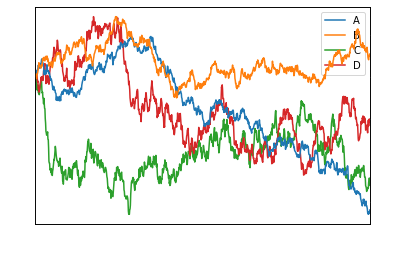

In [17]:
plt.figure()

df.plot(secondary_y=['A', 'B'], mark_right=False)

### Suppressing tick resolution adjustment
> Pandas includes automatically tick resolution adjustment for regular frequency time-series data. For limited cases where pandas cannot infer the frequency information (e.g., in an externally created `twinx`), you can choose to suppress this behavior for alignment purposes.  
  
Here is the default behavior, notice how the x-axis tick labelling is performed:

<AxesSubplot:>

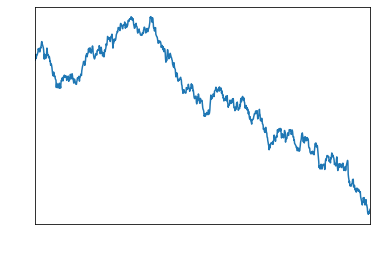

In [18]:
plt.figure() 

df['A'].plot()

Using the `x_compat` parameter, you can suppress this behavior:

<AxesSubplot:>

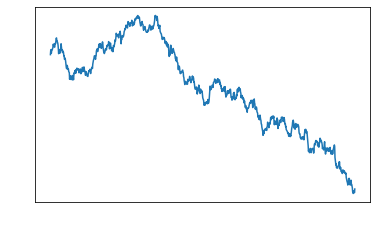

In [19]:
plt.figure()

df['A'].plot(x_compat=True)

If you have more than one plot that needs to be suppressed, the `use` method in `pandas.plot_params` can be used in a with statement:

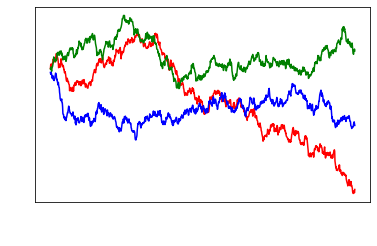

In [21]:
plt.figure()

with pd.plotting.plot_params.use('x_compat', True):
  df['A'].plot(color='r')
  df['B'].plot(color='g')
  df['C'].plot(color='b')

### Targeting different subplots
> You can pass an `ax` argument to `Series.plot` to plot on a particular axis:

Text(0.5, 1.0, 'D')

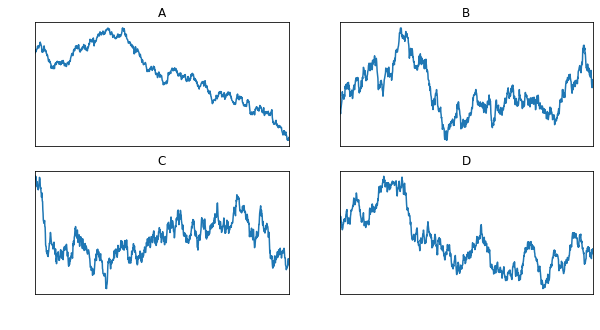

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,5))

df['A'].plot(ax=axes[0,0])
axes[0,0].set_title('A')

df['B'].plot(ax=axes[0,1])
axes[0,1].set_title('B')

df['C'].plot(ax=axes[1,0])
axes[1,0].set_title('C')

df['D'].plot(ax=axes[1,1])
axes[1,1].set_title('D')

# Other plotting features
### Bar plots
> For labeled, non-time series data, you may wish to produce a bar plot:

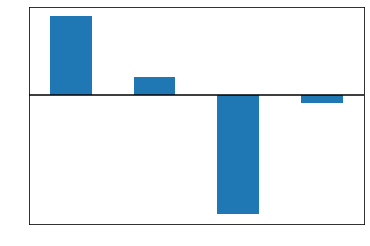

In [39]:
plt.figure()

df.iloc[5].plot(kind='bar')
plt.axhline(0, color='k')

Calling a DataFrame's `plot` method with `kind="bar"` produces a multiple bar plot:

<AxesSubplot:>

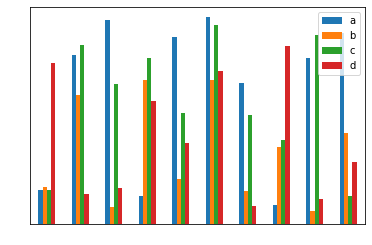

In [40]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])

df2.plot(kind='bar')

To produce a stacked bar plot, pass `stacked=True`:

<AxesSubplot:>

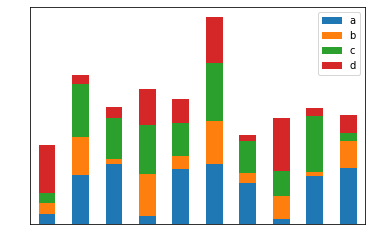

In [41]:
df2.plot(kind='bar', stacked=True)

To get horizontal bar plots, pass `kind="barh"`:

<AxesSubplot:>

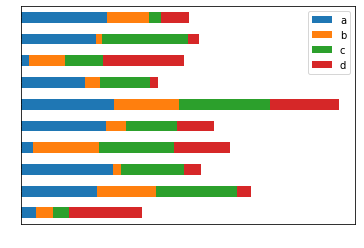

In [43]:
df2.plot(kind='barh', stacked=True)

### Histograms

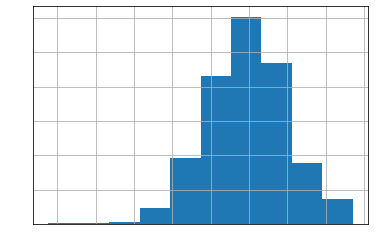

In [44]:
plt.figure()

df['A'].diff().hist();

For a DataFrame, `hist` plots the histograms of the columns on multiple subplots:

<Figure size 432x288 with 0 Axes>

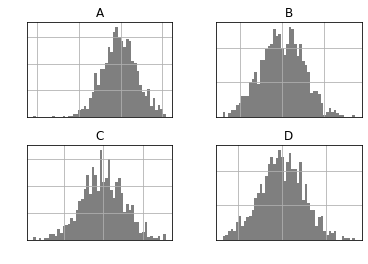

In [46]:
plt.figure()

df.diff().hist(color='k', alpha=0.5, bins=50);

New since 0.10.0, the `by` keyowrd can be specified to plot grouped histograms:

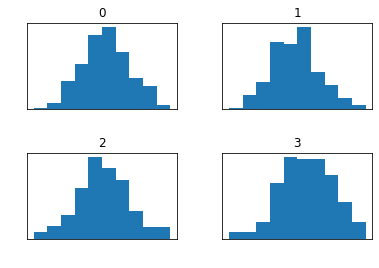

In [49]:
data = pd.Series(np.random.randn(1000))

data.hist(by=np.random.randint(0, 4, 1000), figsize=(6,4));

### Box=Plotting
> DataFrame has a `boxplot` method which allows you to visualize the distribution of values within each column.  
  
For instance, here is a boxplot representing five trials of 10 observations of a uniform random variable on [0,1].

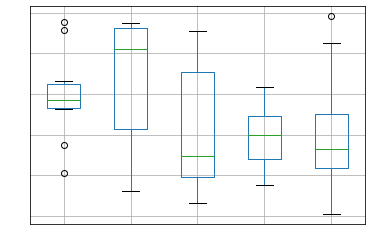

In [50]:
df = pd.DataFrame(np.random.rand(10,5))

plt.figure()

bp = df.boxplot();

You can create a stratified boxplot using the `by` keyword argument to create groupings. For instance,

<Figure size 432x288 with 0 Axes>

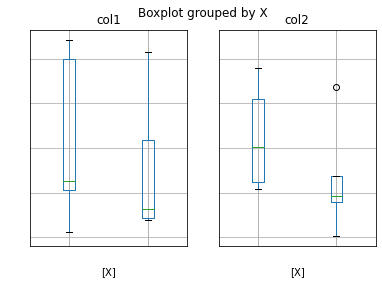

In [51]:
df = pd.DataFrame(np.random.rand(10,2), columns=['col1', 'col2'])
df['X'] = pd.Series(['A','A','A','A','A','B','B','B','B','B'])

plt.figure();

bp = df.boxplot(by='X');

You can also pass a subset of columns to plot, as well as group by multiple columns:

<Figure size 432x288 with 0 Axes>

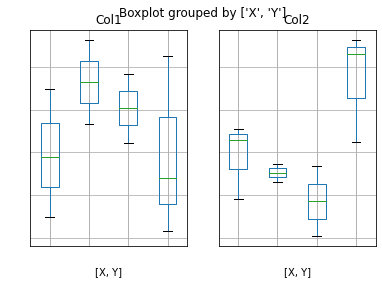

In [52]:
df = pd.DataFrame(np.random.rand(10,3), columns=['Col1', 'Col2', 'Col3'])

df['X'] = pd.Series(['A','A','A','A','A','B','B','B','B','B'])
df['Y'] = pd.Series(['A','B','A','B','A','B','A','B','A','B'])

plt.figure();

bp = df.boxplot(column=['Col1','Col2'], by=['X','Y'])

### Scatter plot matrix

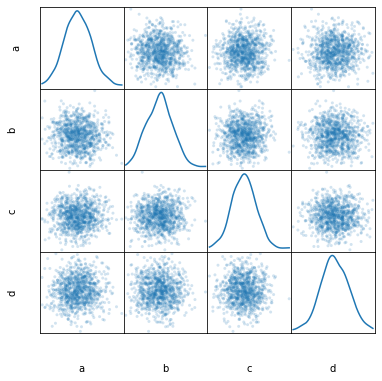

In [53]:
from pandas.plotting import scatter_matrix

df = pd.DataFrame(np.random.randn(1000,4), columns=['a', 'b', 'c', 'd'])

scatter_matrix(df, alpha=0.2, figsize=(6,6), diagonal='kde');

You can create density plots using the Series/DataFrame.plot and setting kind='kde':

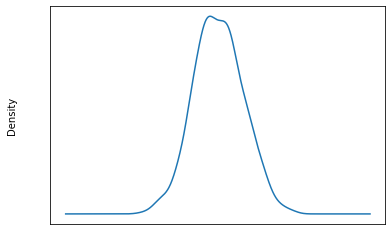

In [54]:
ser = pd.Series(np.random.randn(1000))

ser.plot(kind='kde');

### Andrews Curves
> Andrews curves allow one to plot multivariate data as a large number of curves that are created using the attributes of samples as coefficients for Fourier series. By coloring these curves differently for each class it is possible to visualize data clustering. Curves belonging to samples of the same calss will usually be closer together and form larger structures.
```python
from pandas.plotting import andrews_curves
import pandas as pd 
import matplotlib.pyplot as plt

data = pd.read_csv('iris.data')

plt.figure()
andrews_curves(data, 'Name')
```

### Parallel Coordinates
> Parallel coordinates is a plotting technique for plotting multivariate data. It allows one to see clusters in data and to estimate other statistics visually. Using parallel coordinates points are represented as connected line segments. Each vertical line represents one attribute. One set of connected line segments represents one data point. Points that tend to cluster will appear closer together.
```python
from pandas.plotting import parallel_coordinates
import pandas as pd 
import matplotlib.pyplot as plt

data = pd.read_csv('iris.data')

plt.figure()
parallel_coordinates(data, 'Name')
```


### Lag Plot
> Lag plots are used to check if a data set or time series is random. Random data should not exhibit any structure in the lag plot. Non-random structure implies that the underlying data are not random.

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

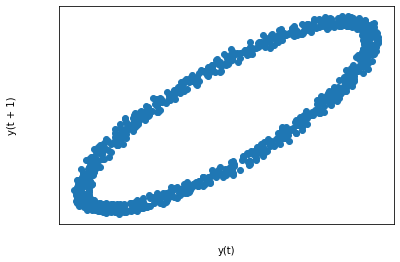

In [55]:
from pandas.plotting import lag_plot

plt.figure() 

data = pd.Series(0.1*np.random.rand(1000) + 0.9*np.sin(np.linspace(-99*np.pi, 99*np.pi, num=1000)))
lag_plot(data)